If csv file does not exist, create it

In [7]:
from os import path
import pandas as pd

xlsxFile = "AxieDetails.xlsx"
csvFile = "AxieDetails.csv"
if not path.exists(csvFile):
    data_xlsx = pd.read_excel(xlsxFile, 'Sheet3', dtype=str, index_col=None)
    data_xlsx.to_csv(csvFile, encoding='utf-8', index=False)

Get list of Axie prices for every breed count

In [8]:
myInt = 1.0
print(type(myInt))
print(int(myInt))

<class 'float'>
1


In [16]:
import csv

newCsvFile = 'AxieDetailsNew.csv'
breedCountRow = 10
priceRow = 4
priceLastRow = 23
priceQuickRow = 24
priceReasonableRow = 25
pricePatientRow = 26
priceRows = [priceRow, priceLastRow, priceQuickRow, priceReasonableRow, pricePatientRow]
listOfNonPrices = ["This Axie ist not for sale", ""]
zeroBreedCount = []
oneBreedCount = []
twoBreedCount = []
threeBreedCount = []
fourBreedCount = []
fiveBreedCount = []
sixBreedCount = []
sevenBreedCount = []
allBreedCounts = [zeroBreedCount, oneBreedCount, twoBreedCount, threeBreedCount, fourBreedCount, fiveBreedCount, sixBreedCount, sevenBreedCount]
with open(newCsvFile, encoding="utf8") as myFile:
    heading = next(myFile)
    readerObj = list(csv.reader(myFile))


    xxx = 0
    for row in readerObj:
        for price in priceRows:
            if row[price] not in listOfNonPrices:
                allBreedCounts[int(float(row[breedCountRow]))].append(float(row[int(price)].replace(" WETH" ,"")))
                break
        xxx += 1
        if xxx == 200000:
            break

for someList in allBreedCounts:
    #print(someList)
    pass

    

Create plot from the above collected data

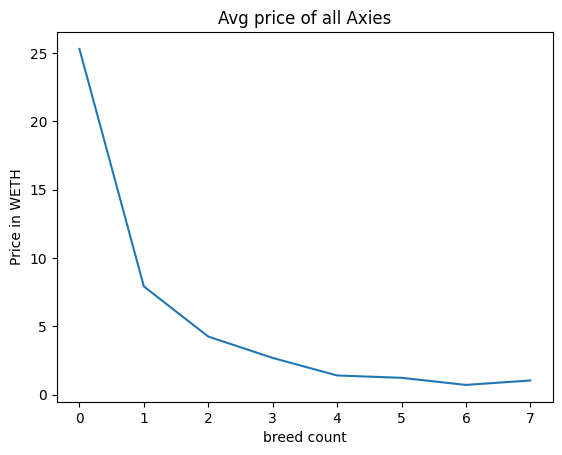

In [17]:
import numpy as np
import matplotlib.pyplot as plt

graphData = []
for somelist in allBreedCounts:
    graphData.append(np.mean(somelist))

plt.plot(graphData)
plt.title("Avg price of all Axies")
plt.xlabel("breed count")
plt.ylabel("Price in WETH")
plt.show()


Test zip function

In [11]:
oneList = [1, 2, 3, 4, 5, 6, 7, 8, 9]
newList = ['a', 'b', 'c', 'd', 'e', 'f']
anotherList = ["hello", "world", "world", "a", "b", "c", "d"] 
print(list(zip(oneList, newList, anotherList)))
allLists = [oneList, newList, anotherList]
print(list(zip(*allLists)))

[(1, 'a', 'hello'), (2, 'b', 'world'), (3, 'c', 'world'), (4, 'd', 'a'), (5, 'e', 'b'), (6, 'f', 'c')]
[(1, 'a', 'hello'), (2, 'b', 'world'), (3, 'c', 'world'), (4, 'd', 'a'), (5, 'e', 'b'), (6, 'f', 'c')]


Create plot from allBreedCounts

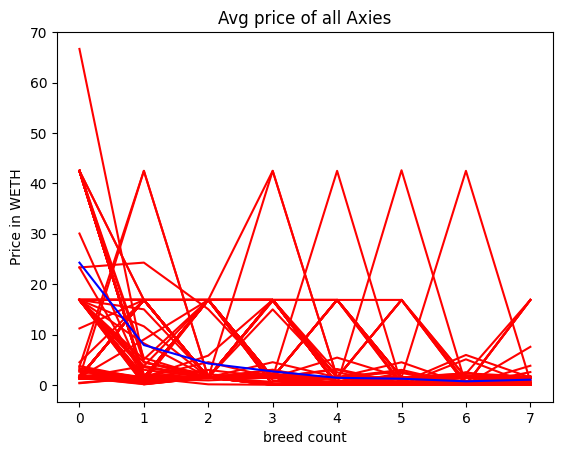

In [15]:
zippedBreedCounts = list(zip(*allBreedCounts))
for somelist in zippedBreedCounts:
    plt.plot(somelist, color = "red")

allBreedCountAvg = []
for somelist in allBreedCounts:
    allBreedCountAvg.append(np.mean(somelist))

plt.plot(allBreedCountAvg, color = "blue")
plt.title("Avg price of all Axies")
plt.xlabel("breed count")
plt.ylabel("Price in WETH")
plt.show()